In [17]:
import os
import pandas as pd
import random

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('fivethirtyeight') 
%matplotlib inline

import librosa

In [18]:
# To get a list of the pathes of all the audio files
data = "ESC-50/audio/"
dataset = pd.read_csv('ESC-50/meta/esc50.csv')
all_files = []
for path, subdirs, files in os.walk(data):
    for name in files:
        all_files.append(os.path.join(path, name))
        
# A dictionary to decode the categories into targets
decoder = {0: 'dog', 14: 'chirping_birds', 36: 'vacuum_cleaner', 19: 'thunderstorm', 30: 'door_wood_knock',34: 'can_opening', 9: 'crow', 22: 'clapping', 48: 'fireworks', 41: 'chainsaw', 47: 'airplane', 31: 'mouse_click', 17: 'pouring_water', 45: 'train', 8: 'sheep', 15: 'water_drops', 46: 'church_bells', 37: 'clock_alarm', 32: 'keyboard_typing', 16: 'wind', 25: 'footsteps', 4: 'frog', 3: 'cow', 27: 'brushing_teeth', 43: 'car_horn', 12: 'crackling_fire', 40: 'helicopter', 29: 'drinking_sipping', 10: 'rain', 7: 'insects', 26: 'laughing', 6: 'hen', 44: 'engine', 23: 'breathing', 20: 'crying_baby', 49: 'hand_saw', 24: 'coughing', 39: 'glass_breaking', 28: 'snoring', 18: 'toilet_flush', 2: 'pig', 35: 'washing_machine', 38: 'clock_tick', 21: 'sneezing', 1: 'rooster', 11: 'sea_waves', 42: 'siren', 5: 'cat', 33: 'door_wood_creaks', 13: 'crickets'}

# A dictionary to encode the categories into targets
encoder = {'dog': 0, 'chirping_birds': 14, 'vacuum_cleaner': 36, 'thunderstorm': 19, 'door_wood_knock': 30, 'can_opening': 34, 'crow': 9, 'clapping': 22, 'fireworks': 48, 'chainsaw': 41, 'airplane': 47, 'mouse_click': 31, 'pouring_water': 17, 'train': 45, 'sheep': 8, 'water_drops': 15, 'church_bells': 46, 'clock_alarm': 37, 'keyboard_typing': 32, 'wind': 16, 'footsteps': 25, 'frog': 4, 'cow': 3, 'brushing_teeth': 27, 'car_horn': 43, 'crackling_fire': 12, 'helicopter': 40, 'drinking_sipping': 29, 'rain': 10, 'insects': 7, 'laughing': 26, 'hen': 6, 'engine': 44, 'breathing': 23, 'crying_baby': 20, 'hand_saw': 49, 'coughing': 24, 'glass_breaking': 39, 'snoring': 28, 'toilet_flush': 18, 'pig': 2, 'washing_machine': 35, 'clock_tick': 38, 'sneezing': 21, 'rooster': 1, 'sea_waves': 11, 'siren': 42, 'cat': 5, 'door_wood_creaks': 33, 'crickets': 13}

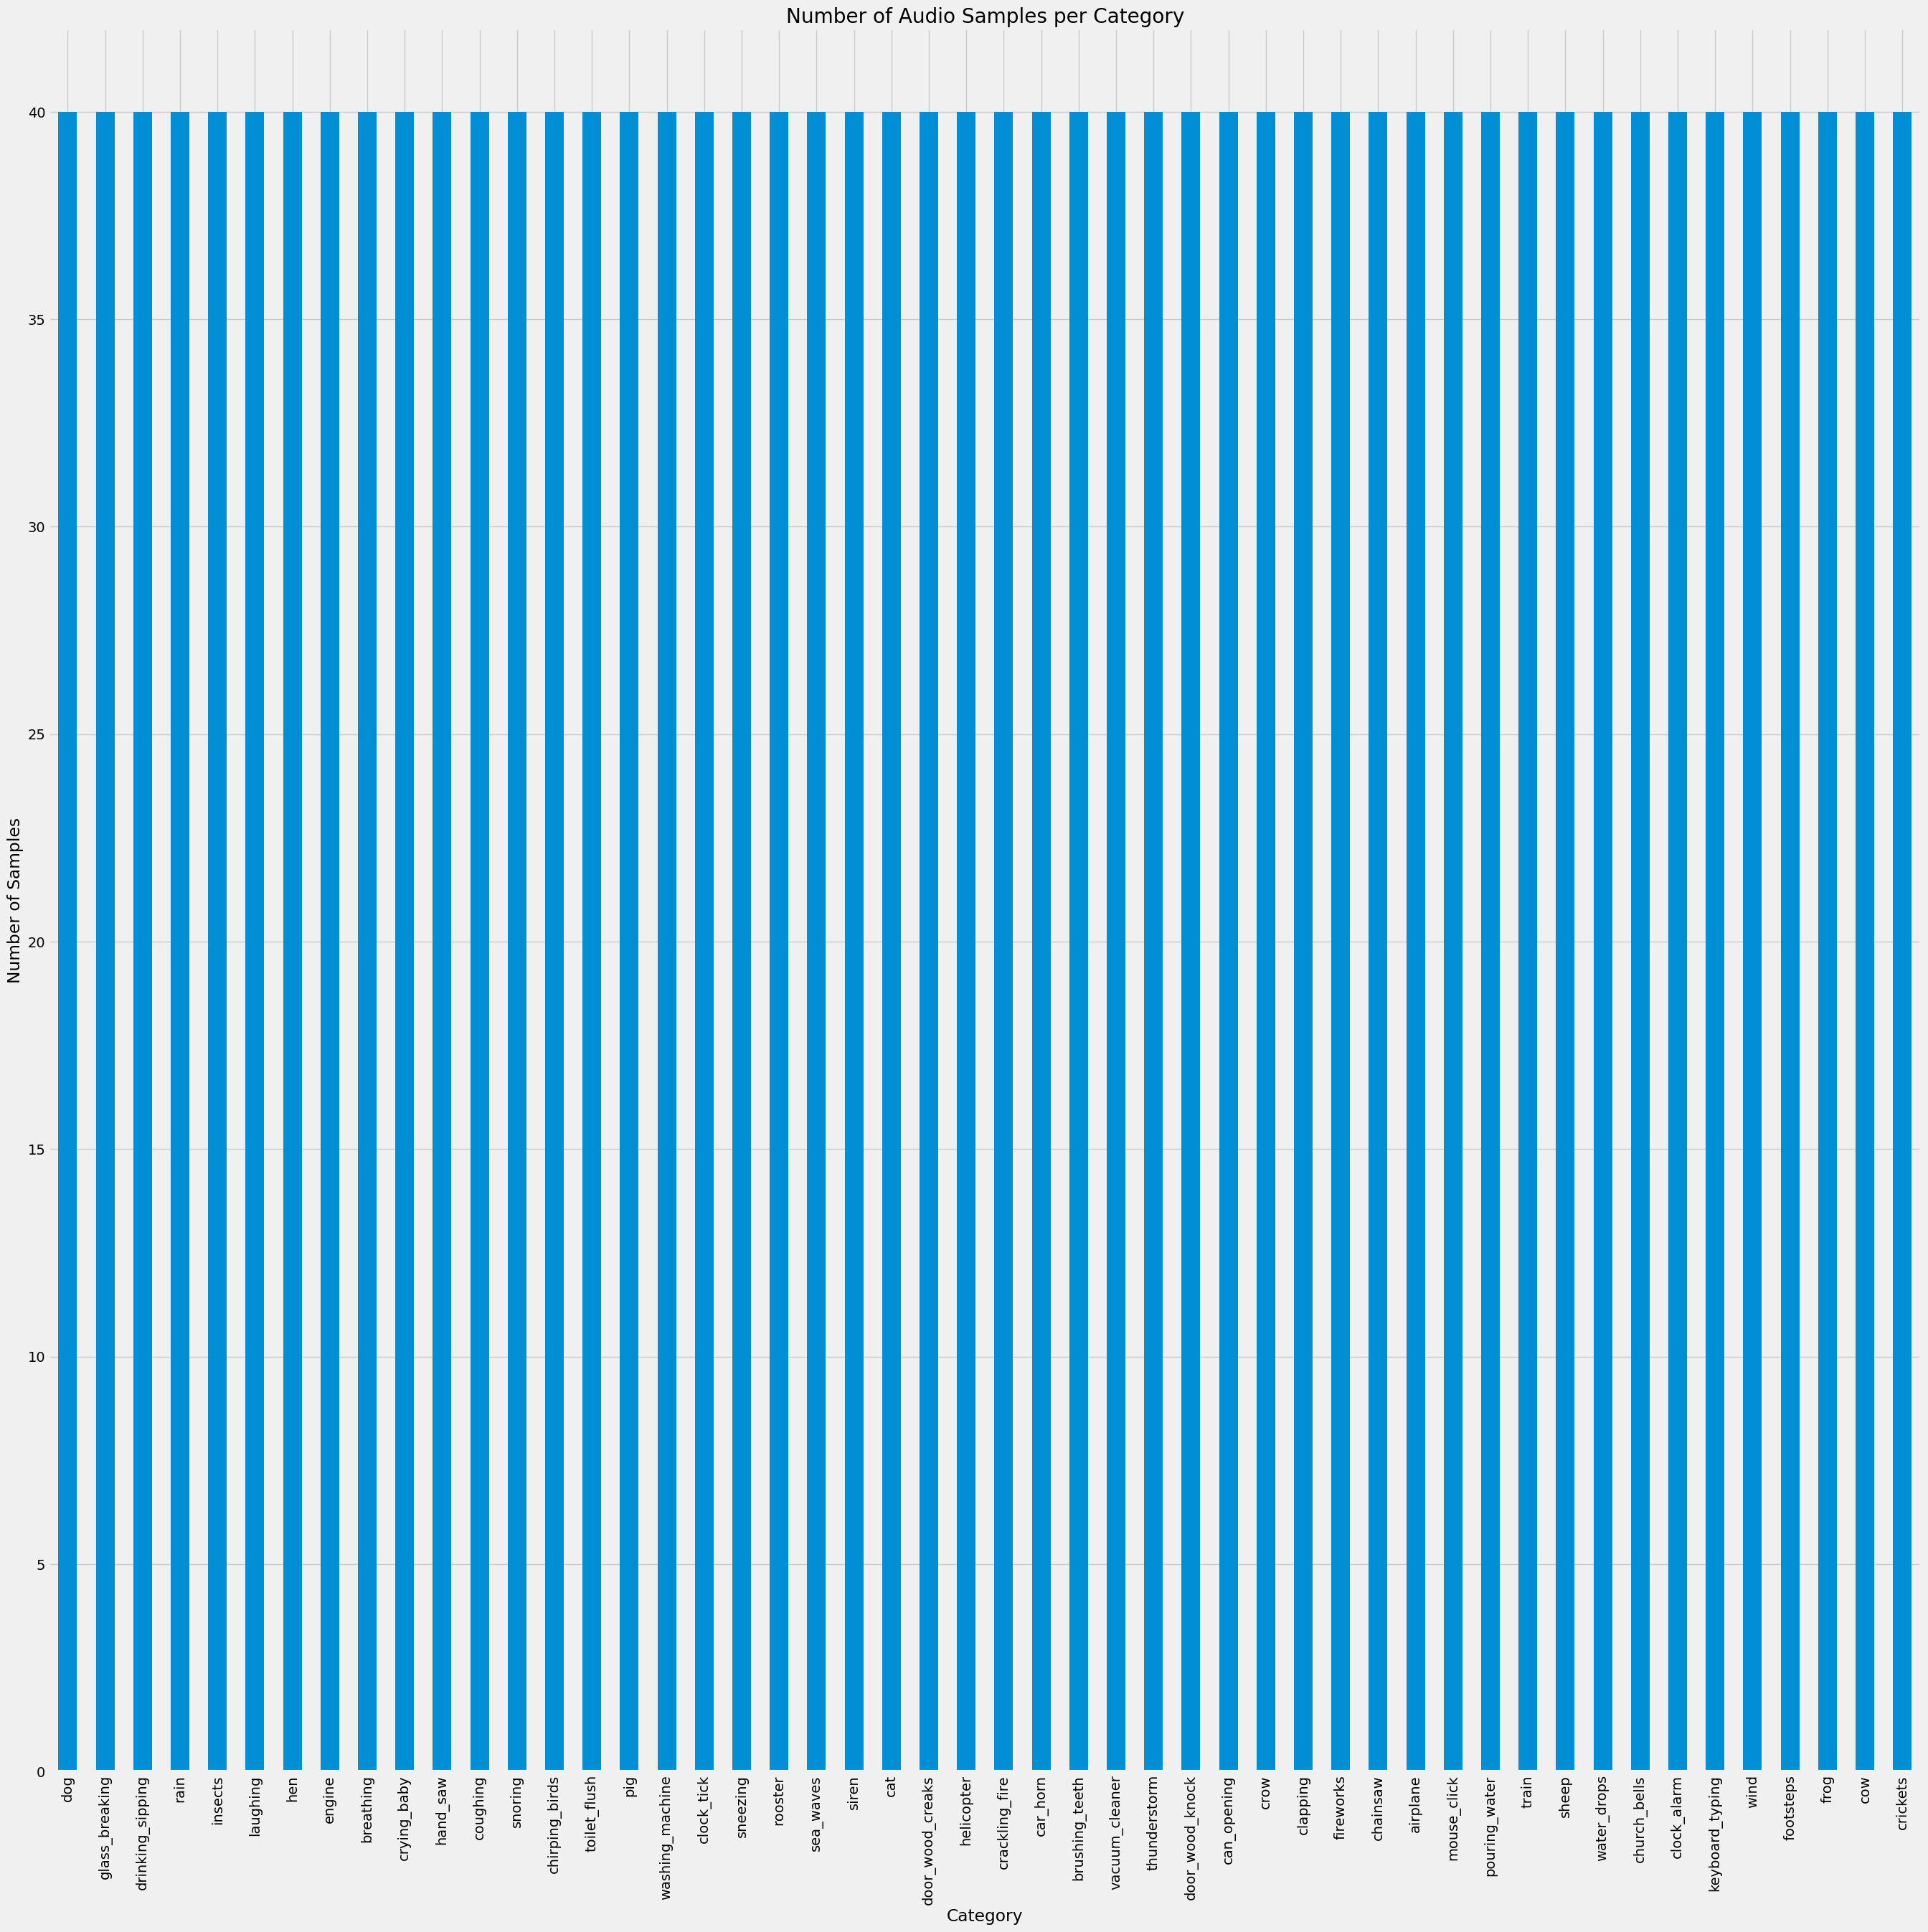

In [19]:
category_group = dataset['category'].value_counts()
plot = category_group.plot(kind='bar', title="Number of Audio Samples per Category", figsize=(30,30))
plot.set_xlabel("Category")
plot.set_ylabel("Number of Samples");

In [20]:
plot_files = random.choices(all_files, k = 10)
plot_audios = [librosa.load(plot_files[i]) for i in range(10)]

In [27]:
plot_files[0]

'ESC-50/audio/5-213836-D-9.wav'

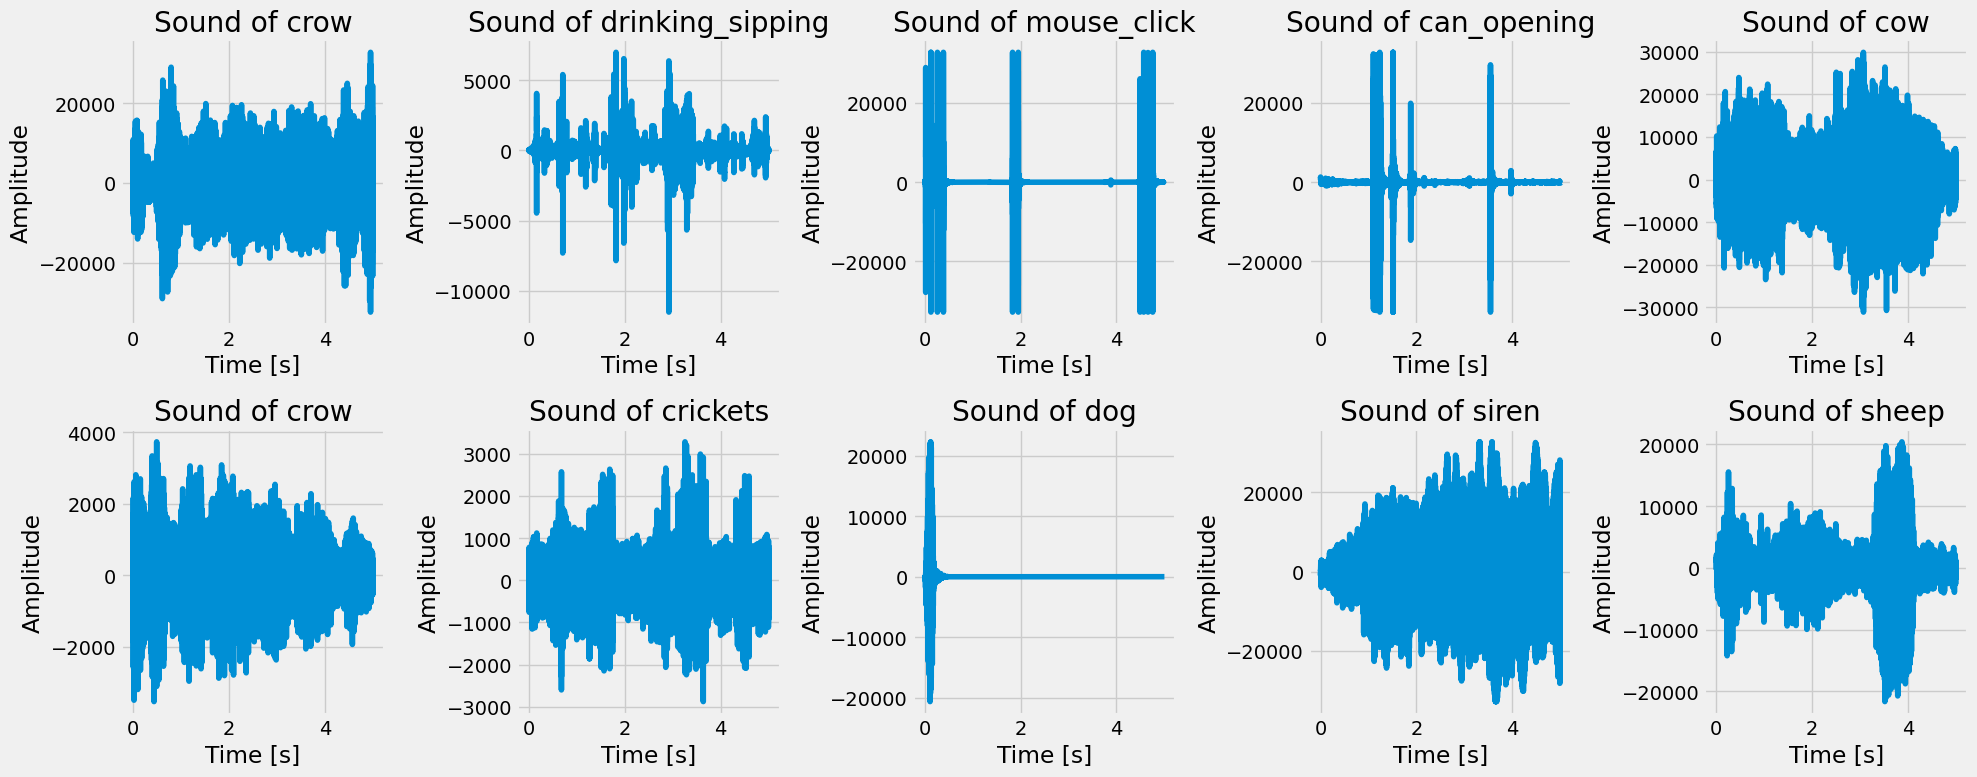

/Users/sakshamsingh/anaconda3/envs/project/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7944: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


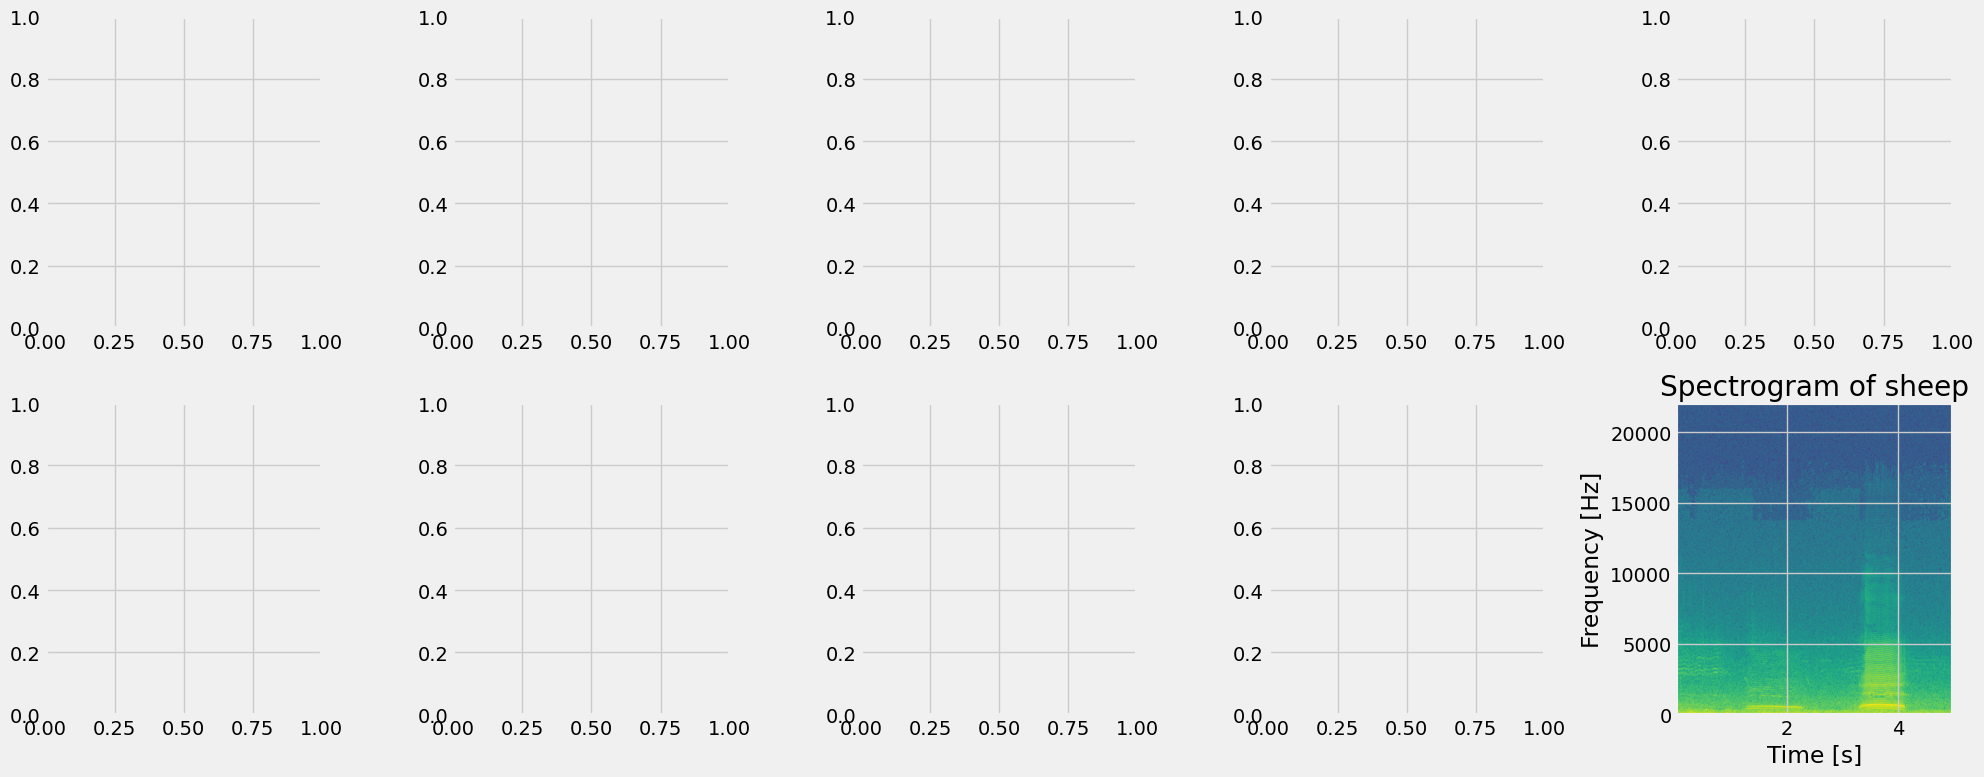

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wav

# Generate waveform plots
fig, axs = plt.subplots(2, 5, figsize=(20, 8))

for i, file_path in enumerate(plot_files):
    # Read the audio file
    rate, signal = wav.read(file_path)
    
    # Create time vector
    time = np.linspace(0, len(signal) / rate, num=len(signal))

    # Plotting the waveform
    row = i // 5
    col = i % 5
    axs[row, col].plot(time, signal)
    label = decoder[int(file_path.split('/')[-1].split('-')[-1].split('.')[0])]
    axs[row, col].set_title("Sound of " +  label)
    axs[row, col].set_xlabel('Time [s]')
    axs[row, col].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()



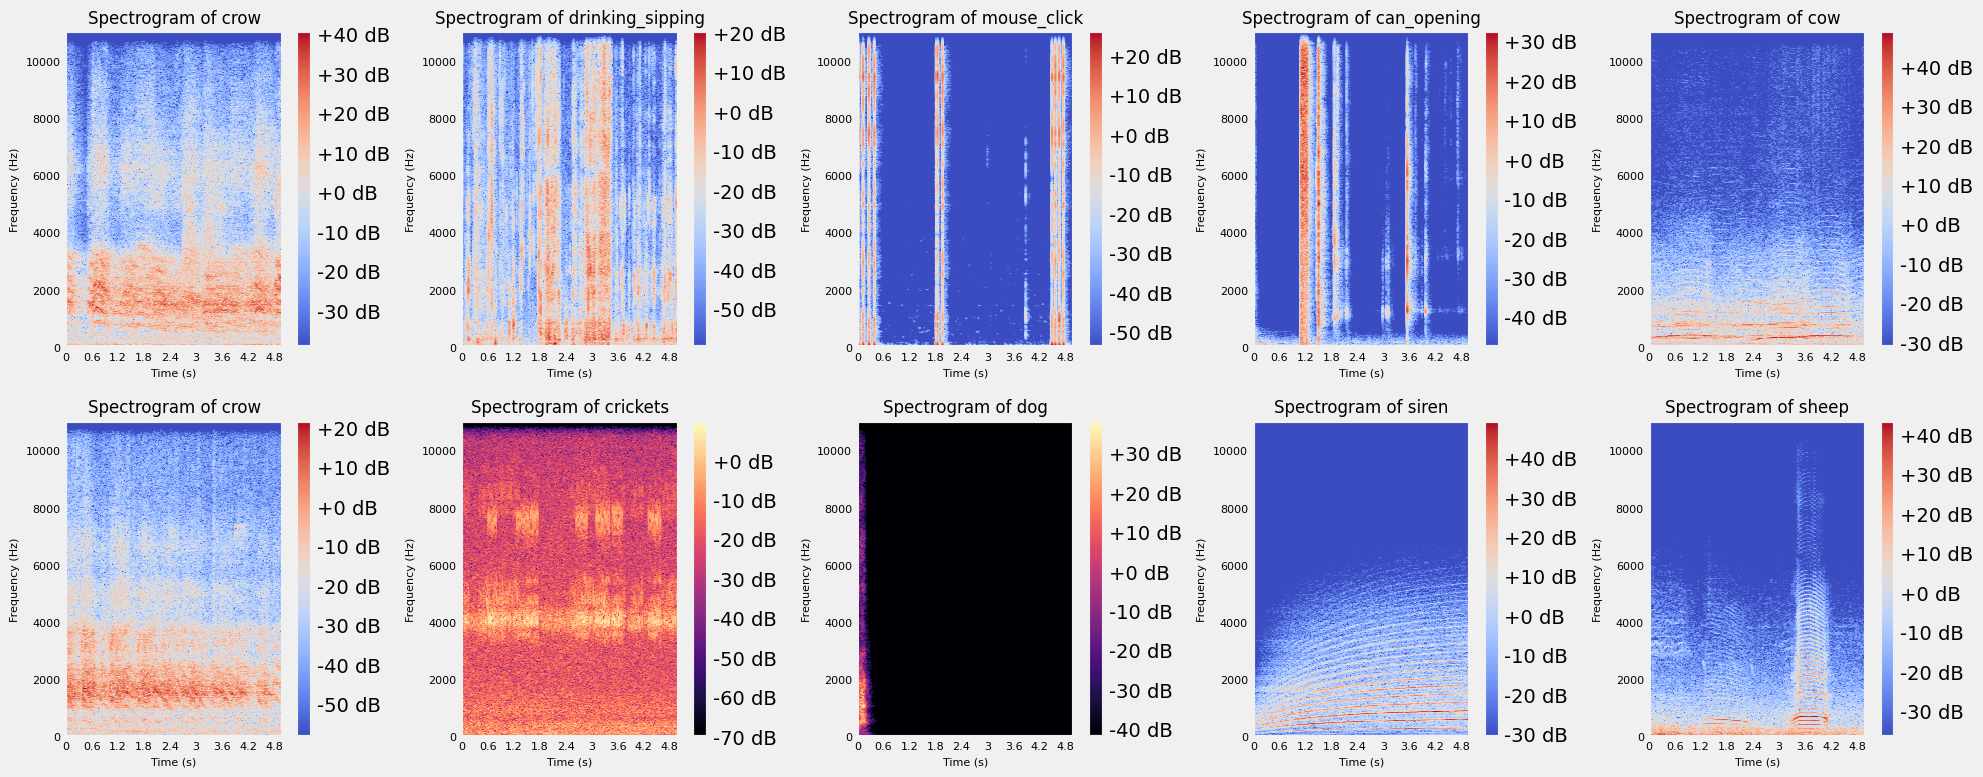

In [39]:

fig, axs = plt.subplots(2, 5, figsize=(20, 8))

for i in range(10):
    # Compute the spectrogram
    X = librosa.stft(plot_audios[i][0])
    Xdb = librosa.amplitude_to_db(abs(X))
    
    # Plotting the spectrogram
    row = i // 5
    col = i % 5
    img = librosa.display.specshow(Xdb, sr=plot_audios[i][1], x_axis='time', y_axis='hz', ax=axs[row, col])
    fig.colorbar(img, ax=axs[row, col], format="%+2.0f dB")
    
    # Setting the title
    try:
        axs[row, col].set_title("Spectrogram of " + decoder[int(plot_files[i][-6:-4])], fontsize=12)
    except:
        axs[row, col].set_title("Spectrogram of " + decoder[int(plot_files[i][-5:-4])], fontsize=12)
    
    axs[row, col].set_xlabel('Time (s)', fontsize=8)
    axs[row, col].set_ylabel('Frequency (Hz)', fontsize=8)
    axs[row, col].tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout()
plt.show()